# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [131]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 582
['margaret river', 'port-aux-francais', 'puerto ayora', 'lompoc', 'bergen auf rugen', 'stanley', 'zaozersk', 'iqaluit', 'cabo san lucas', 'bethel', 'adamstown', 'geraldton', 'road town', 'urangan', 'ushuaia', 'bilibino', 'blackmans bay', 'taro', 'papatowai', 'nova sintra', 'waitangi', 'fale old settlement', 'taiohae', 'jamestown', 'dudinka', 'san antonio de pale', 'grytviken', 'shinjo', 'quellon', 'gadzhiyevo', 'puerto san carlos', 'kirakira', 'sault ste. marie', 'dubovka', 'adrar', 'mount isa', 'al ghayzah', 'patong', 'ust-nera', 'yellowknife', 'cimitarra', 'georgetown', 'birobidzhan', 'sokoni', 'puerto natales', 'tolanaro', 'wailua homesteads', 'hawaiian paradise park', 'hilo', 'ilulissat', 'pemangkat', 'boguchany', 'invercargill', 'mugia', 'kodiak', 'murzuq', 'jiexiu', 'chaplygin', 'selfoss', 'lorengau', 'altagracia de orituco', 'anadyr', 'revda', 'chonchi', 'hamilton', 'albany', 'isafjordur', 'college', 'weno', 'constantia', 'ribeira grande', 'petr

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [132]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (response['weather'][0])

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"] - 273.15
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | bergen auf rugen
City not found. Skipping...
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | zaozersk
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | road town
Processing Record 14 of Set 1 | urangan
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | taro
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | nova sintra
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set

Processing Record 34 of Set 4 | fujin
Processing Record 35 of Set 4 | vanino
Processing Record 36 of Set 4 | chhor
Processing Record 37 of Set 4 | el granada
Processing Record 38 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 39 of Set 4 | al kharijah
Processing Record 40 of Set 4 | uturoa
Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | saksaul'skiy
City not found. Skipping...
Processing Record 43 of Set 4 | usogorsk
Processing Record 44 of Set 4 | as sulayyil
Processing Record 45 of Set 4 | usinsk
Processing Record 46 of Set 4 | la passe
Processing Record 47 of Set 4 | port alberni
Processing Record 48 of Set 4 | whitehorse
Processing Record 49 of Set 4 | afaahiti
Processing Record 0 of Set 5 | port saint john's
Processing Record 1 of Set 5 | zinder
Processing Record 2 of Set 5 | riyadh
Processing Record 3 of Set 5 | howrah
Processing Record 4 of Set 5 | hithadhoo
Processing Record 5 of Set 5 | krasnyy chikoy
Processing Record 6 of Set 5 | quel

Processing Record 25 of Set 8 | callao
Processing Record 26 of Set 8 | bestobe
Processing Record 27 of Set 8 | beau vallon
Processing Record 28 of Set 8 | sinop
Processing Record 29 of Set 8 | mersrags
Processing Record 30 of Set 8 | touros
Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | saint-philippe
Processing Record 33 of Set 8 | nalgonda
Processing Record 34 of Set 8 | planaltina
Processing Record 35 of Set 8 | aldinga beach
Processing Record 36 of Set 8 | nguigmi
Processing Record 37 of Set 8 | natal
Processing Record 38 of Set 8 | leava
Processing Record 39 of Set 8 | karbala
Processing Record 40 of Set 8 | shizunai-furukawacho
Processing Record 41 of Set 8 | heroica caborca
Processing Record 42 of Set 8 | saint-denis
Processing Record 43 of Set 8 | pariang
City not found. Skipping...
Processing Record 44 of Set 8 | inari
Processing Record 45 of Set 8 | taiobeiras
Processing Record 46 of Set 8 | indi
Processing Record 47 of Set 8 | ola
Processing Recor

Processing Record 14 of Set 12 | artesia
Processing Record 15 of Set 12 | ciudad lazaro cardenas
Processing Record 16 of Set 12 | gore
Processing Record 17 of Set 12 | al azraq ash shamali
City not found. Skipping...
Processing Record 18 of Set 12 | kuytun
Processing Record 19 of Set 12 | franklin
Processing Record 20 of Set 12 | vila franca do campo
Processing Record 21 of Set 12 | namsos
Processing Record 22 of Set 12 | hassi messaoud
Processing Record 23 of Set 12 | sao gabriel da cachoeira
Processing Record 24 of Set 12 | miracema do tocantins
Processing Record 25 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 26 of Set 12 | okhotsk
Processing Record 27 of Set 12 | gaiman
Processing Record 28 of Set 12 | ha'il
Processing Record 29 of Set 12 | selibaby
Processing Record 30 of Set 12 | kitimat
Processing Record 31 of Set 12 | ivanava
-----------------------------
Data Retrieval Complete      
-----------------------------


In [133]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [134]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,15.00,58,99,4.41,AU,1684701240
1,port-aux-francais,-49.3500,70.2167,6.60,89,92,14.28,TF,1684701320
2,puerto ayora,-0.7393,-90.3518,28.98,88,58,3.13,EC,1684701475
3,lompoc,34.6391,-120.4579,27.79,79,100,6.71,US,1684701475
4,stanley,54.8680,-1.6985,9.87,78,0,1.54,GB,1684701475


In [135]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [136]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,15.00,58,99,4.41,AU,1684701240
1,port-aux-francais,-49.3500,70.2167,6.60,89,92,14.28,TF,1684701320
2,puerto ayora,-0.7393,-90.3518,28.98,88,58,3.13,EC,1684701475
3,lompoc,34.6391,-120.4579,27.79,79,100,6.71,US,1684701475
4,stanley,54.8680,-1.6985,9.87,78,0,1.54,GB,1684701475


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

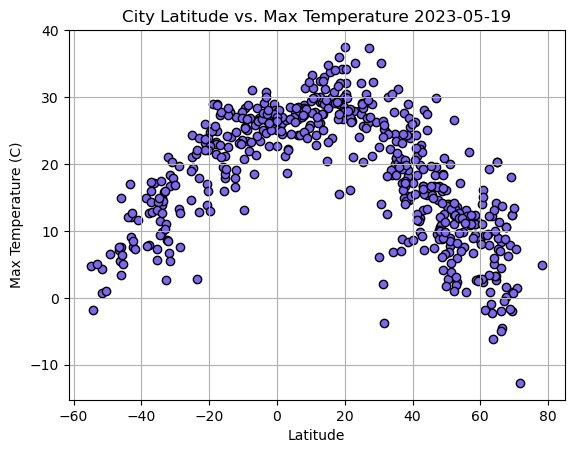

In [137]:
# Build scatter plot for latitude vs. temperature
lat_all = city_data_df["Lat"]
temp_all = city_data_df["Max Temp"]
plt.scatter(lat_all, temp_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

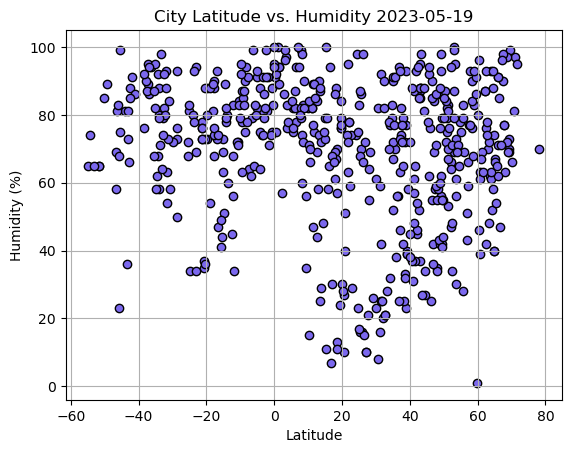

In [138]:
# Build the scatter plots for latitude vs. humidity
lat_all = city_data_df["Lat"]
humid_all = city_data_df["Humidity"]
plt.scatter(lat_all, humid_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

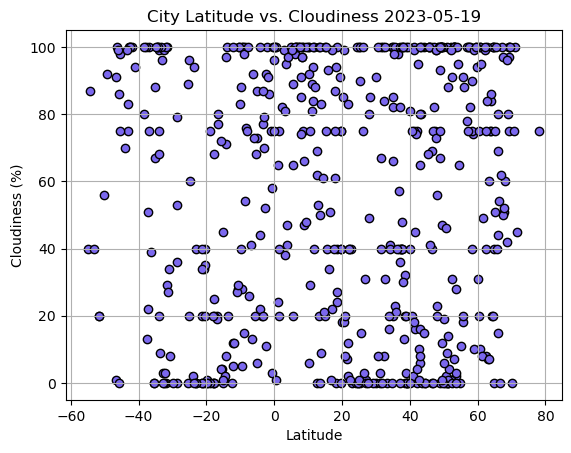

In [139]:
# Build the scatter plots for latitude vs. cloudiness
lat_all = city_data_df["Lat"]
cloud_all = city_data_df["Cloudiness"]
plt.scatter(lat_all, cloud_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

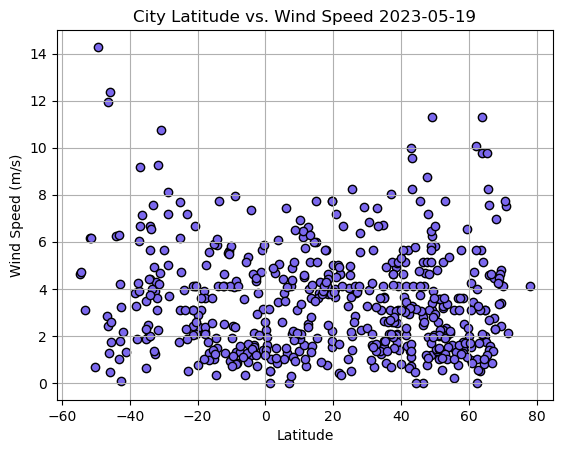

In [140]:
# Build the scatter plots for latitude vs. wind speed
lat_all = city_data_df["Lat"]
wind_all = city_data_df["Wind Speed"]
plt.scatter(lat_all, wind_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [157]:
# Define a function to create Linear Regression plots

# Define model
def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create regression line and add to plot
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

# Calculate and print Pearson's r value
    r_squared = round(rvalue**2, 16)
    print(f"The r-value is: {r_squared}")
    
# Remaining graphical elements for all plots
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    
    return line_eq, r_squared

In [142]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,lompoc,34.6391,-120.4579,27.79,79,100,6.71,US,1684701475
4,stanley,54.8680,-1.6985,9.87,78,0,1.54,GB,1684701475
5,zaozersk,69.4005,32.4476,12.39,73,97,3.40,RU,1684701475
6,iqaluit,63.7506,-68.5145,-6.15,62,75,5.66,CA,1684701432
7,cabo san lucas,22.8909,-109.9124,35.17,29,0,6.69,MX,1684701287


In [143]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,15.00,58,99,4.41,AU,1684701240
1,port-aux-francais,-49.3500,70.2167,6.60,89,92,14.28,TF,1684701320
2,puerto ayora,-0.7393,-90.3518,28.98,88,58,3.13,EC,1684701475
9,adamstown,-25.0660,-130.1015,24.40,81,96,7.68,PN,1684701205
10,geraldton,-28.7667,114.6000,13.23,50,0,7.20,AU,1684701477


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6297322619827932


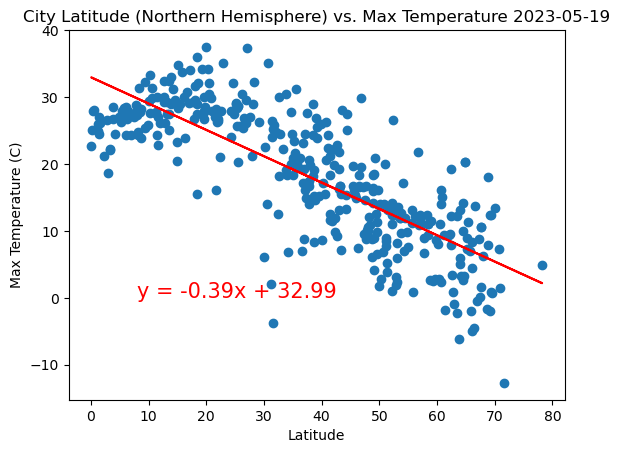

In [172]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Northern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (8, 0), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.7269542880398687


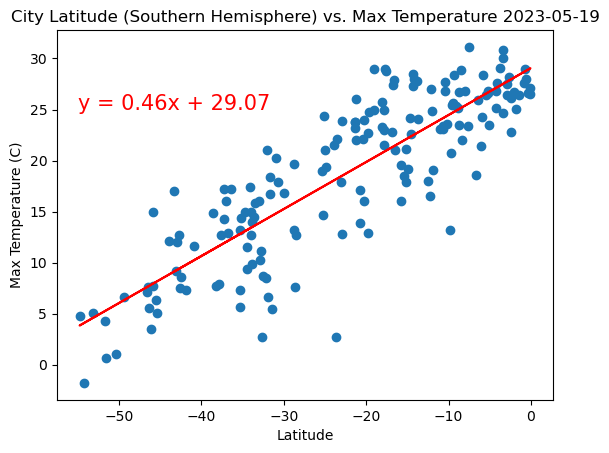

In [163]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Southern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 1.19056139767e-05


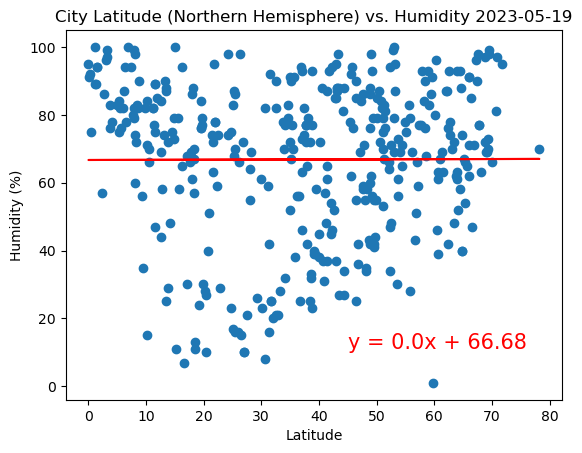

In [164]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Northern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (45, 11), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig7.png")
plt.show()

The r-value is: 0.0081990247970118


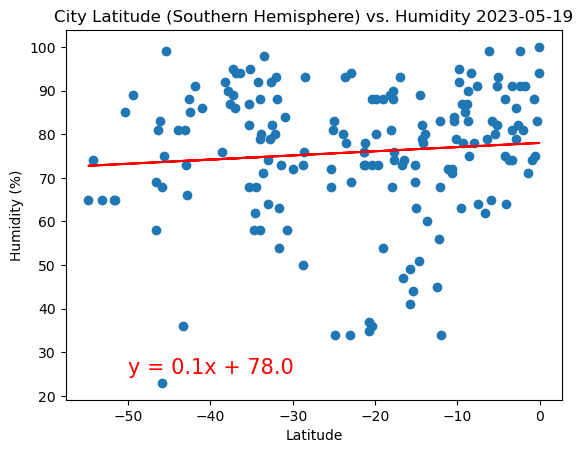

In [170]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0004112317189727


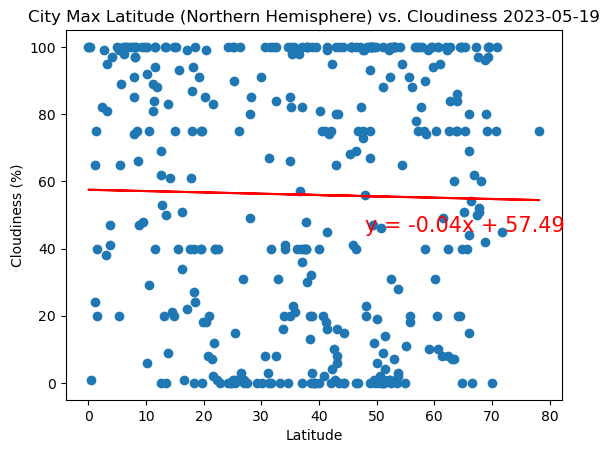

In [166]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (48, 45), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: 0.0067596116401841


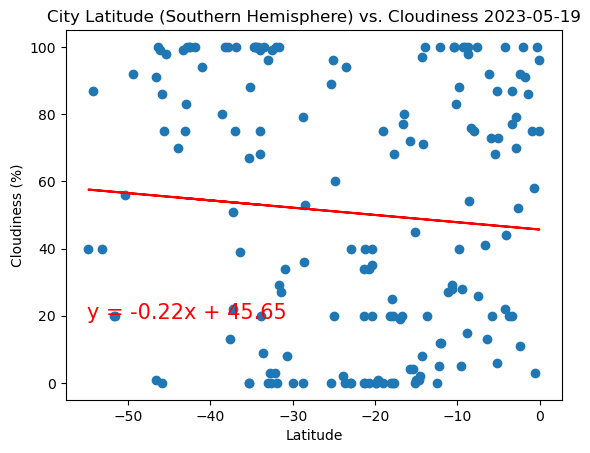

In [167]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 19), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0001807855298688


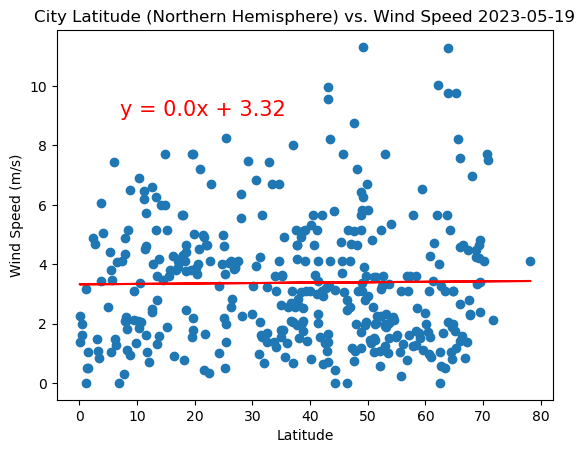

In [173]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (7, 9), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: 0.0635448716029908


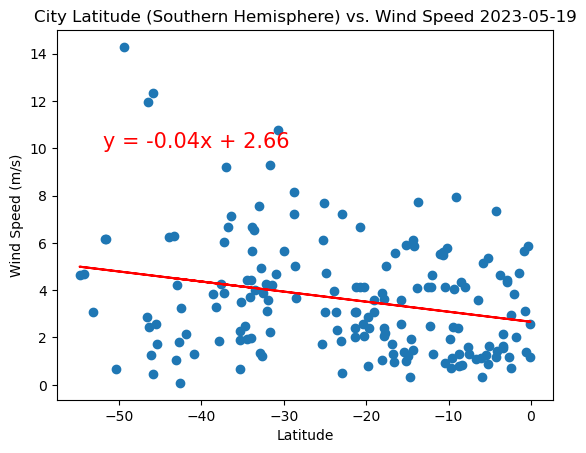

In [169]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Southern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-52, 10), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE